<a href="https://colab.research.google.com/github/ananyasrivastav/Linear-Regression/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'x,y\n77,79.77515201\n21,23.17727887\n22,25.60926156\n20,17.85738813\n36,41.84986439\n15,9.805234876\n62,58.87465933\n95,97.61793701\n20,18.39512747\n5,8.746747654\n4,2.811415826\n19,17.09537241\n96,95.14907176\n62,61.38800663\n36,40.24701716\n15,14.82248589\n65,66.95806869\n14,16.63507984\n87,90.65513736\n69,77.22982636\n89,92.11906278\n51,46.91387709\n89,89.82634442\n27,21.71380347\n97,97.41206981\n58,57.01631363\n79,78.31056542\n21,19.1315097\n93,93.03483388\n27,26.59112396\n99,97.55155344\n31,31.43524822\n33,35.12724777\n80,78.61042432\n28,33.07112825\n47,51.69967172\n53,53.62235225\n69,69.46306072\n28,27.42497237\n33,36.34644189\n91,95.06140858\n71,68.16724757\n50,50.96155532\n76,78.04237454\n4,5.607664865\n37,36.11334779\n70,67.2352155\n68,65.01324035\n40,38.14753871\n35,34.31141446\n94,95.28503937\n88,87.84749912\n52,54.08170635\n31,31.93063515\n59,59.61247085\n0,-1.040114209\n39,47.49374765\n64,62.60089773\n69,70.9146434\n57,56.14834113\n13,14.05572877\n72,68.1136

In [0]:
dirty_training_set = pd.read_csv('train.csv')
dirty_test_set = pd.read_csv('test.csv')


In [7]:
training_set = dirty_training_set.dropna() 
test_set = dirty_test_set.dropna() 
print ("Rows before clean: ", dirty_training_set.size, "\n")
print ("Rows after clean: ", training_set.size, "\n")
print (training_set.loc[0:5]['y'])
print (training_set.loc[0:5]['x'])
x_training_set = training_set.as_matrix(['x'])
y_training_set = training_set.as_matrix(['y'])
x_test_set = test_set.as_matrix(['x'])
y_test_set = test_set.as_matrix(['y'])
print ("Mean of X Training set: ", np.mean(x_training_set), "\n")
print ("Median of X Training set: ", np.median(x_training_set), "\n")
print ("Mean of Y Training set: ", np.mean(y_training_set), "\n")
print ("Median of Y Training set: ", np.median(y_training_set), "\n")
print ("Std Dev of X Training set: ", np.std(x_training_set), "\n")
print ("Std Dev of Y Training set: ", np.std(y_training_set), "\n")

Rows before clean:  1400 

Rows after clean:  1398 

0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
5    32.463875
Name: y, dtype: float64
0    24.0
1    50.0
2    15.0
3    38.0
4    87.0
5    36.0
Name: x, dtype: float64
Mean of X Training set:  50.01430615164521 

Median of X Training set:  49.0 

Mean of Y Training set:  49.939869170457804 

Median of Y Training set:  48.97302037 

Std Dev of X Training set:  28.933841385275375 

Std Dev of Y Training set:  29.08838760426971 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


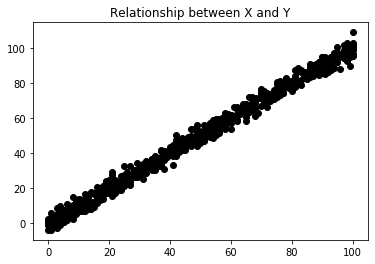

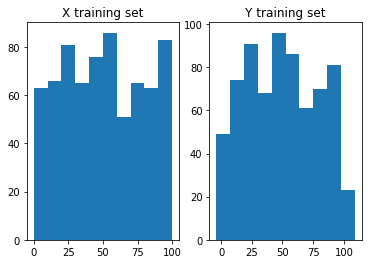

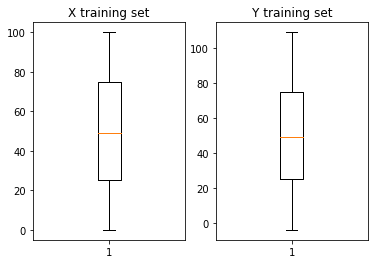

In [8]:
plt.title('Relationship between X and Y')
plt.scatter(x_training_set, y_training_set,  color='black')
plt.show()

plt.subplot(1, 2, 1)
plt.title('X training set')
plt.hist(x_training_set)

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.hist(y_training_set)
plt.show()

plt.subplot(1, 2, 1)
plt.title('X training set')
plt.boxplot(x_training_set)

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.boxplot(y_training_set)
plt.show()

In [13]:
lm = linear_model.LinearRegression()
lm.fit(x_training_set,y_training_set)
print('R sq: ',lm.score(x_training_set,y_training_set))
print('Correlation: ', math.sqrt(lm.score(x_training_set,y_training_set)))
print("Coefficient for X ", lm.coef_)
print ("Standard Error: ",st.sem(x_training_set))
ttest = lm.coef_/st.sem(x_training_set)
print ("The t-statistic:",ttest)
print ("Two tailed p-values: ")


R sq:  0.9907015319025518
Correlation:  0.9953399077212527
Coefficient for X  [[1.00065638]]
Standard Error:  [1.09516205]
The t-statistic: [[0.91370623]]
Two tailed p-values: 


In [11]:
TSS = y_training_set
TSS = [i**2 for i in TSS]
TSS = np.sum(TSS)
y_predicted = lm.predict(x_training_set) 
y_variance = y_training_set - y_predicted
y_variance = [i**2 for i in y_variance] 
RSS = np.sum(y_variance)
Fstatistic = (TSS - RSS) / (RSS/(np.size(y_predicted) - 2))
print ("The F-statistic is:  ", Fstatistic)

The F-statistic is:   295202.86908682744


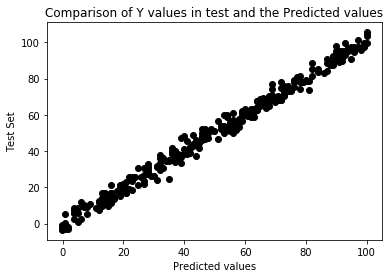

In [12]:
y_predicted = lm.predict(x_test_set)

plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(y_predicted, y_test_set,  color='black')
plt.show()